# Mediciones para Backtracking

### Imports

In [2]:
import matplotlib.pyplot as plt
from solucion_optima.solucion_optima import empaquetamiento_optimo
from aproximacion_curso.aproximacion_curso import empaquetamiento_aproximado_curso
from aproximacion_grupo.aproximacion_grupo import empaquetamiento_aproximado_grupo
from leer_archivo import leer_archivo

ImportError: cannot import name 'empaquetamiento_optimo' from 'solucion_optima' (unknown location)

In [23]:
T = [0.02,0.03,0.135,0.758,0.011,0.05,0.077,0.683,0.939,0.038,0.165,0.224,0.152,0.918,0.049,0.485,0.551,0.79,0.69,0.21,0.097,0.345,0.655,0.962,0.291,0.449,0.164,0.023,0.039]

### Funciones

In [24]:
def obtener_soluciones(n_max, empaquetamiento):
    tiempos = []
    cantidades  = []
    for i in range(0, n_max + 1, 5):
        arreglo = T[:i]
        solucion, tiempo = empaquetamiento(arreglo)
        tiempos.append(tiempo)
        cantidades.append(len(solucion))
    return cantidades, tiempos


### Gráfico

In [30]:
n_max = 20
cantidades = [i for i in range(0, n_max + 1, 5)]

In [ ]:
cantidades_sol_exacta, tiempos_sol_exacta = obtener_soluciones(n_max, empaquetamiento_optimo)
cantidades_sol_aprox_curso, tiempos_sol_aprox_curso = obtener_soluciones(n_max, empaquetamiento_aproximado_curso)
cantidades_sol_aprox_grupo, tiempos_sol_aprox_grupo = obtener_soluciones(n_max, empaquetamiento_aproximado_grupo)

plt.plot(cantidades, tiempos_sol_exacta, s=80, label='Solución Exacta')
plt.plot(cantidades, tiempos_sol_aprox_curso, s=40, label='Solución Aprox. Curso')
plt.plot(cantidades, tiempos_sol_aprox_grupo, s=20, label='Solución Aprox. Grupo')

plt.title('Tiempo de ejecución en función de n')
plt.xlabel('Largo del arreglo (n)')
plt.ylabel('Tiempo de ejecución')
plt.legend()
plt.show()

### Comparación con el algoritmo aproximado

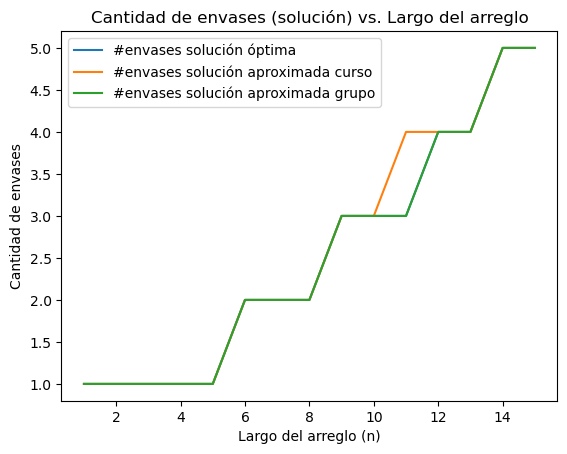

In [38]:
plt.plot(cantidades, cantidades_sol_exacta, label='#envases solución óptima')
plt.plot(cantidades, cantidades_sol_aprox_curso, label='#envases solución aproximada curso')
plt.plot(cantidades, cantidades_sol_aprox_grupo, label='#envases solución aproximada grupo')
plt.title('Cantidad de envases (solución) vs. Largo del arreglo')
plt.xlabel('Largo del arreglo (n)')
plt.ylabel('Cantidad de envases')
plt.legend()
plt.show()

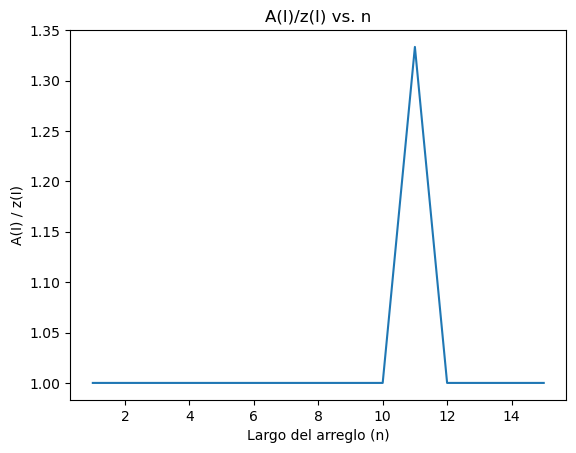

In [39]:
cocientes = [cantidades_sol_aprox_curso[i] / cantidades_sol_exacta[i] for i in range(n_max)]
plt.plot(cantidades, cocientes)

plt.title('A(I)/z(I) vs. n')
plt.xlabel('Largo del arreglo (n)')
plt.ylabel('A(I) / z(I)')
plt.show()

### Soluciones optimas vs aproximaciones (curso y grupo)

Se crearon nuevos datasets a partir de los proporcionados por la catedra. Por simplicidad, se tomo como cota superior del valor optimo de estos nuevos datasets a la suma de los optimos de cada dataset usado.

In [10]:
aproximacion_curso_valor = []
aproximacion_grupo_valor = []

aproximacion_curso_tiempos = []
aproximacion_grupo_tiempos = []

optimos_dataset = [3, 10, 20, 30, 40, 53, 60]

tam_entradas = []

for n in optimos_dataset:
    arreglo, tam_entrada = leer_archivo(f"./datasets/env{n}.txt")
    tam_entradas.append(tam_entrada)
    solucion_curso, tiempo_curso = empaquetamiento_aproximado_curso(arreglo)
    solucion_grupo, tiempo_grupo = empaquetamiento_aproximado_grupo(arreglo)
    aproximacion_curso_valor.append(len(solucion_curso[0]))
    aproximacion_grupo_valor.append(len(solucion_grupo[0]))
    aproximacion_curso_tiempos.append(tiempo_curso)
    aproximacion_grupo_tiempos.append(tiempo_grupo)


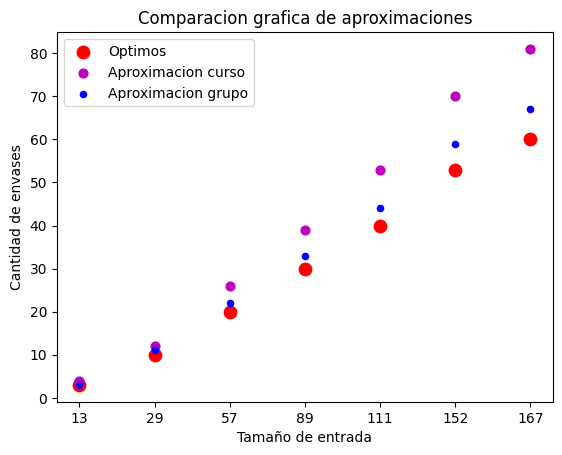

In [9]:
plt.scatter(tam_entradas, optimos_dataset, c = 'r', s=80, label="Optimos")
plt.scatter(tam_entradas, aproximacion_curso_valor, c = 'm', s=40, label="Aproximacion curso")
plt.scatter(tam_entradas, aproximacion_grupo_valor, c = 'b', s=20, label="Aproximacion grupo")


plt.title(f'Comparacion grafica de aproximaciones')
plt.xlabel('Tamaño de entrada')
plt.ylabel('Cantidad de envases')
plt.legend()
plt.show()

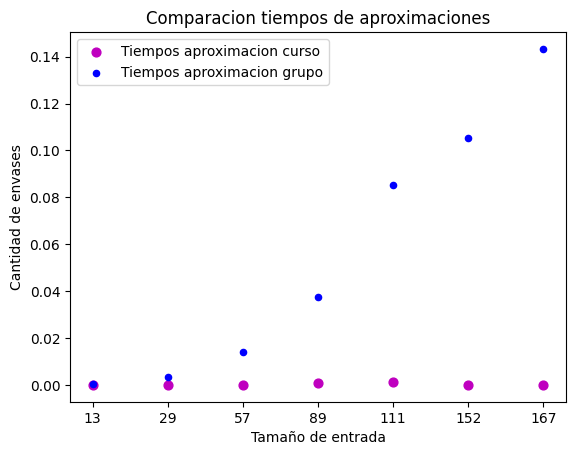

In [11]:

plt.scatter(tam_entradas, aproximacion_curso_tiempos, c = 'm', s=40, label="Tiempos aproximacion curso")
plt.scatter(tam_entradas, aproximacion_grupo_tiempos, c = 'b', s=20, label="Tiempos aproximacion grupo")


plt.title(f'Comparacion tiempos de aproximaciones')
plt.xlabel('Tamaño de entrada')
plt.ylabel('Cantidad de envases')
plt.legend()
plt.show()